In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,ElasticNet, Ridge, Lasso

In [51]:
df = pd.read_csv("data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

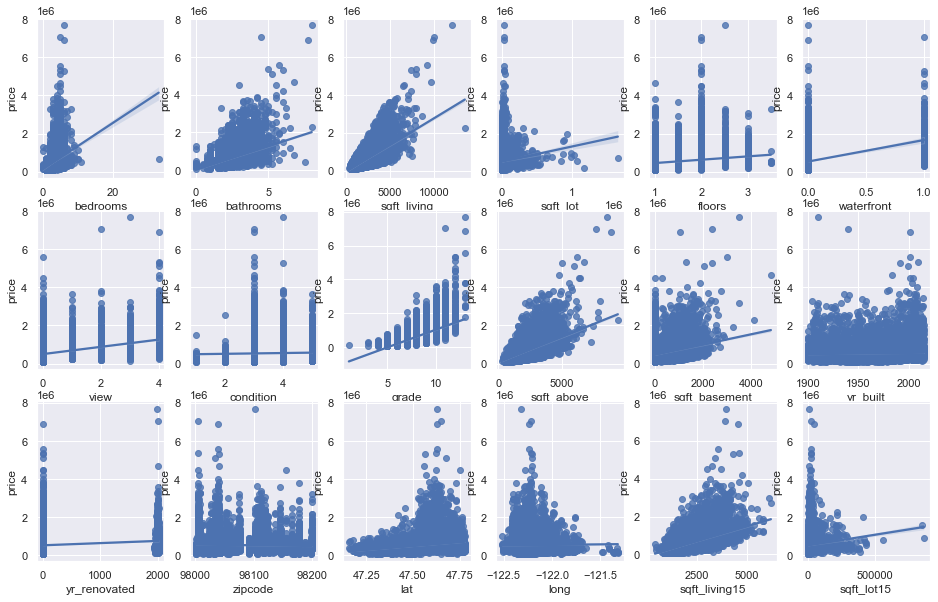

In [53]:
columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront",
"view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated",
"zipcode","lat","long","sqft_living15","sqft_lot15"
]

fig, axes = plt.subplots(3, 6,figsize=(16,10))
for i in range(len(columns)):
    if i < 6:
        sns.regplot(ax=axes[0,i], x=df[columns[i]], y=df["price"])
    elif i < 12:
        sns.regplot(ax=axes[1,i-6], x=df[columns[i]], y=df["price"])
    else:
        sns.regplot(ax=axes[2,i-12], x=df[columns[i]], y=df["price"])

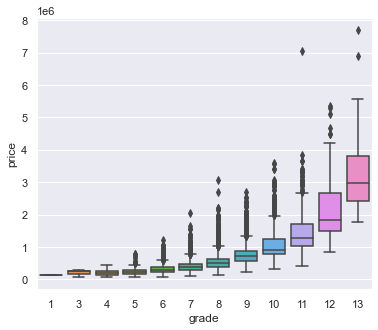

In [54]:
sns.boxplot(data=df,x="grade",y="price")
sns.set(rc={'figure.figsize':(6,5)})

In [55]:
X_columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","grade","sqft_above","sqft_basement"]
y_column = "price"

x = df[X_columns].to_numpy()
y = df[y_column].to_numpy()

In [57]:
reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.5510645332015909

In [60]:
reg = ElasticNet().fit(x,y)
reg.score(x,y)

C:\Users\boure\anaconda3\envs\rudy_datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.917e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


0.5386636481144255

In [63]:
reg = Ridge().fit(x,y)
reg.score(x,y)

0.5510645327475354

In [67]:
reg = Lasso().fit(x,y)
reg.score(x,y)

C:\Users\boure\anaconda3\envs\rudy_datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.002e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


0.5510645332015852